# Data Collection

In [ ]:
install.packages(c("rtweet", "RCurl", "tidyverse", "ggmap", "ggplot2", "maps", "mapdata", "plyr", "reshape2", "usmap", "sp"))

In [3]:
library(rtweet)
library(RCurl)
library(tidyverse)
library(ggmap)
library(ggplot2)
library(maps)
library(mapdata)
library(plyr)
library(reshape2)
library(usmap)

In [1]:
#Query and store data as CSV
consumer_key<-'<Twitter API key>'
consumer_secret<-'<Twitter API key>'
access_token<-'<Twitter API key>'
access_secret<-'<Twitter API key>'
create_token(app = "<app name>",consumer_key=consumer_key,consumer_secret=consumer_secret,access_token =  access_token,access_secret =  access_secret)
tweets<-search_tweets("flu OR influenza",n=20000,retryonratelimit=TRUE, type = "recent", include_rts = F, until = "2019-03-07")
write_as_csv(tweets, "Raw_Tweets.csv", prepend_ids = F, na = "", fileEncoding = "UTF-8")

ERROR: Error in create_token(app = "<app name>", consumer_key = consumer_key, : could not find function "create_token"


In [6]:
#obtain geocode from the data
data= read.csv("Raw_Tweets.csv")
nrow(data)
print(length(unique(data$status_id)))
data<-data[!duplicated(data$status_id),]
print(length(unique(data$status_id)))
nrow(data)
data<-lat_lng(data)
data$location
data_loc<-geocode(as.character(data$location),output = "latlona")
write.csv(data_loc, "Final_Tweets.csv")
states_abb<-as.data.frame(state.abb)
data_loc$address[2]
for(i in 1:nrow(states_abb))
{
  state_name<-tolower(states_abb$state.abb[i])
  if(grepl(paste("^",state_name,"$",sep ="" ),data_loc$address[1])==T){
    state<-data.frame(regex) 
  } else if(grepl(paste(" ",state_name,",",sep ="" ),data_loc$address[1])==T){
    regex<-paste(" ",state_name,",",sep ="" )
    state<-data.frame(substr(regex,1,nchar(regex)-1))
    colnames(state)[1]<-"regex"
  }  else if(grepl(paste(" ",state_name," ",sep ="" ),data_loc$address[1])==T){
    regex<-paste(" ",state_name,",",sep ="" )
    state<-data.frame(substr(regex,2,nchar(regex)-1))
    colnames(state)[1]<-"regex"
  } else if(grepl(paste(",",state_name," ",sep ="" ),data_loc$address[1])==T){
    regex<-paste(" ",state_name,",",sep ="" )
    state<-data.frame(substr(regex,2,nchar(regex)-1))
    colnames(state)[1]<-"regex"
  } else if(grepl(paste(" ",state_name,",",sep ="" ),data_loc$address[1])==T){
    regex<-paste(" ",state_name,",",sep ="" )
    state<-data.frame(substr(regex,2,nchar(regex)-1))
    colnames(state)[1]<-"regex"
  }
}
state
for(i in 1:nrow(states_abb))
{
  state_name<-tolower(states_abb$state.abb[i])
  for(j in 2:nrow(data_loc)){
    state_name<-tolower(states_abb$state.abb[i])
    if(grepl(paste("^",state_name,"$",sep ="" ),data_loc$address[j])==T){
      temp<-data.frame(regex) 
      next
    } else if(grepl(paste(" ",state_name,",",sep ="" ),data_loc$address[j])==T){
      regex<-paste(" ",state_name,",",sep ="" )
      temp<-data.frame(substr(regex,1,nchar(regex)-1))
      colnames(temp)[1]<-"regex"
      state<-rbind(state,temp)
      next
    } else if(grepl(paste(" ",state_name," ",sep ="" ),data_loc$address[j])==T){
      regex<-paste(" ",state_name,",",sep ="" )
      temp<-data.frame(substr(regex,2,nchar(regex)-1))
      colnames(temp)[1]<-"regex"
      state<-rbind(state,temp)
      next
    } else if(grepl(paste(",",state_name," ",sep ="" ),data_loc$address[j])==T){
      regex<-paste(" ",state_name,",",sep ="" )
      temp<-data.frame(substr(regex,2,nchar(regex)-1))
      colnames(temp)[1]<-"regex"
      state<-rbind(state,temp)
      next
    } else if(grepl(paste(" ",state_name,",",sep ="" ),data_loc$address[j])==T){
      regex<-paste(" ",state_name,",",sep ="" )
      temp<-data.frame(substr(regex,2,nchar(regex)-1))
      colnames(temp)[1]<-"regex"
      state<-rbind(state,temp)
      next
    }
  }
}
for(i in 1:nrow(states_abb)){
  state_name<-states_abb$state.abb[i]
  if(grepl(state_name,state$regex[1],ignore.case = T)==T){
    print(state_name)
    final_state<-data.frame(state.name[match(state_name,state.abb)])
    colnames(final_state)[1]<-"STATE_NAME"
  }
}
for(i in 1:nrow(states_abb)){
  state_name<-states_abb$state.abb[i]
  for(j in 2:nrow(state)){
    if(grepl(state_name,state$regex[j],ignore.case = T)==T){
      temp<-data.frame(state.name[match(state_name,state.abb)])
      colnames(temp)[1]<-"STATE_NAME"
      final_state<-rbind(final_state,temp)
    }
  }
}
final_state
count_df<-plyr::count(final_state,"STATE_NAME")

Warning message in file(file, "rt"):
"cannot open file 'Raw_Tweets.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


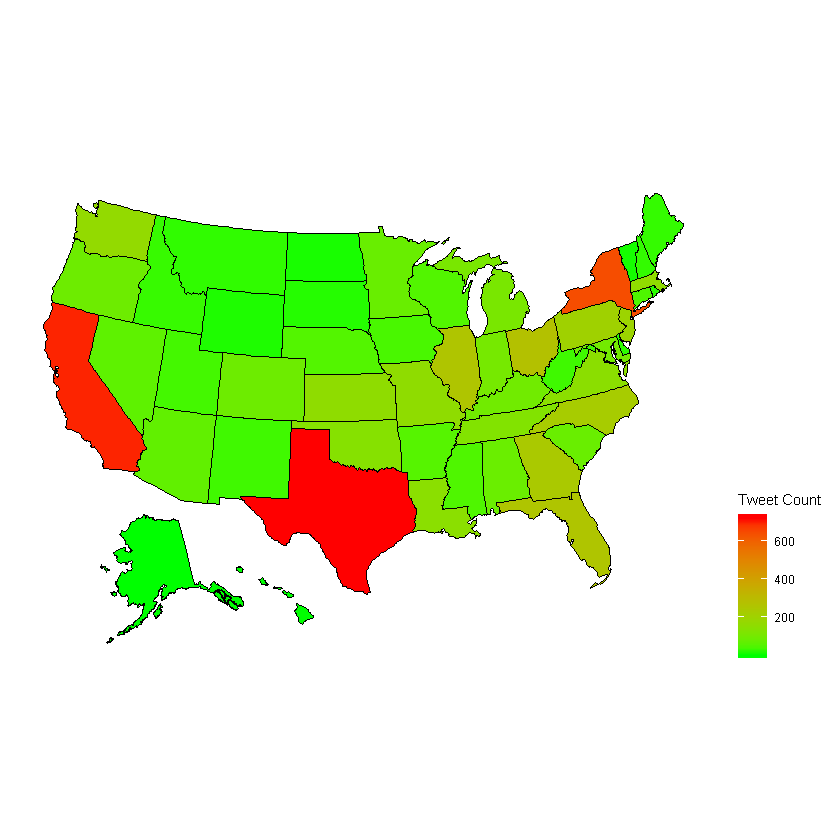

In [7]:
data <- read.csv("C:/Users/ankim/OneDrive/Documents/data/Total_count.csv")
      count_df <- subset(data, select = c("state", "freq"))
      count_df$freq<-as.numeric(count_df$freq)
      colnames(count_df)[1]<-"state"
      write.csv(count_df, "Total_count.csv")
      plot_usmap(data = count_df, values = "freq") + 
        scale_fill_continuous(
          low = "green", high = "red", name = "Tweet Count", label = scales::comma
        ) + theme(legend.position = "right")

# Task 4

Inference: Twitter data is highly inaccurate for representing disease trends whereas CDC data is highly reliable and it gives correct representation of scenario

# Task 5

For flu the most data has been collected from NY, California and Texas
For influenza the most data has been collected from Texas

 # Task 6

## Shiny App

In [ ]:
#
# This is a Shiny web application. You can run the application by clicking
# the 'Run App' button above.
#
# Find out more about building applications with Shiny here:
#
#    http://shiny.rstudio.com/
#

library(shiny)
library(ggplot2)
library(ggmap)
library(maptools)
library(maps)
library(reshape2)
library(sp)
library(usmap)

# Define UI for application that draws a histogram
ui <- fluidPage(
  
   headerPanel("Lab1"),
   
   titlePanel("Lab1 Shiny App"),
   
   sidebarPanel(
     fileInput(inputId = "filedata", label = "Upload data. Choose csv file", accept = c(".csv")),
     selectInput("graph", label = "Choose:", choices = c("CDC Map", "Twitter Map", "CDC Map VS Twitter Map")),
     submitButton("Update View")
   ),
   
   mainPanel(
     plotOutput("plot1", height = 400, width = 700)
     )
   
)

# Define server logic required to draw a histogram
server <- function(input, output) {
  output$plot1 <- renderPlot({
    if (input$graph == "CDC Map") {
      csv_data <- read.csv("C:/Users/ankim/OneDrive/Documents/data/heatmap.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
      my_data = data.frame(region = tolower(csv_data$STATENAME), level = csv_data$ACTIVITY.LEVEL, stringsAsFactors = F)
      my_data[,2] <- substring(my_data[,2], 6, 8)
      my_data$level <- (as.numeric(my_data$level) + 10)
      head(my_data)
      states_map <- map_data("state")
      
      ggplot(data = my_data, aes(map_id = region)) + 
        geom_map(aes(fill = factor(as.character(my_data$level))), map = states_map ,colour = "black") +
        scale_fill_manual(values = c("white","green4", "green3", "green2","green1", "greenyellow","yellow", "orange","red1", "red2", "red3"),labels = c("insufficient data", "Minimal", "Minimal", "Minimal", "Low", "Low", "Moderate", "Moderate", "High", "High", "High")) +
        theme_classic() +
        labs(title = "Heat Map of USA", x = "", y = "") +
        expand_limits(x = states_map$long, y = states_map$lat) +
        theme(axis.line = element_blank(), axis.text.x = element_blank(), axis.text.y = element_blank(), axis.ticks.x = element_blank(), axis.ticks.y = element_blank())
    }
    else if (input$graph == "Twitter Map") {
      data <- read.csv("C:/Users/ankim/OneDrive/Documents/data/Total_count.csv")
      count_df <- subset(data, select = c("state", "freq"))
      count_df$freq<-as.numeric(count_df$freq)
      colnames(count_df)[1]<-"state"
      write.csv(count_df, "Total_count.csv")
      plot_usmap(data = count_df, values = "freq") + 
        scale_fill_continuous(
          low = "green", high = "red", name = "Tweet Count", label = scales::comma
        ) + theme(legend.position = "right")
    }
    else if (input$graph == "CDC Map VS Twitter Map") {
      print("Check the other two maps")
    }
  })
  
}

# Run the application 
shinyApp(ui = ui, server = server)